In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv("BoomBikes.csv")

In [4]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [5]:
df['season'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})


In [6]:
df['season'].astype('category').value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [7]:
df['mnth'] = df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                             7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [8]:
df['mnth'].astype('category').value_counts()

mnth
Aug    62
Dec    62
Jan    62
Jul    62
Mar    62
May    62
Oct    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: count, dtype: int64

In [9]:
df['weekday'] = df['weekday'].map({1:'Mon', 2:'Tues', 3:'Wed', 4:'Thurs', 5:'Fri', 6:'Sat', 0:'Sun'})


In [10]:
df['weekday'].astype('category').value_counts()

weekday
Mon      105
Sat      105
Sun      105
Fri      104
Thurs    104
Tues     104
Wed      103
Name: count, dtype: int64

In [11]:
df['weathersit'] = df['weathersit'].map({1:'A', 2:'B', 3:'C'})


In [12]:
df['weathersit'].astype('category').value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

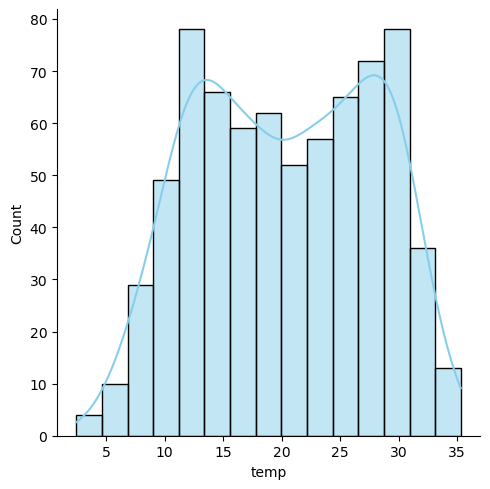

In [13]:
# temperature
sns.displot(df['temp'], kde=True, bins=15, color='skyblue')

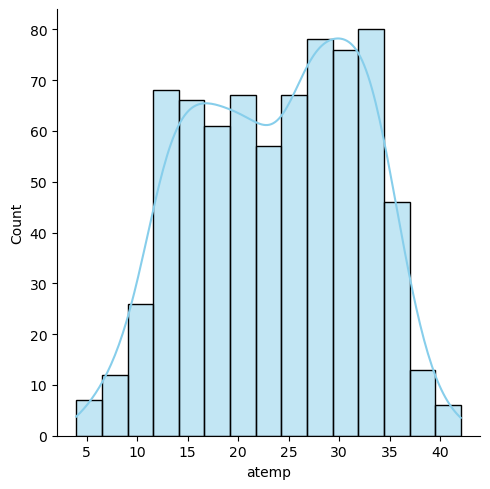

In [20]:
# Actual temperature
sns.displot(df['atemp'], kde=True, bins=15, color='skyblue')
plt.show()

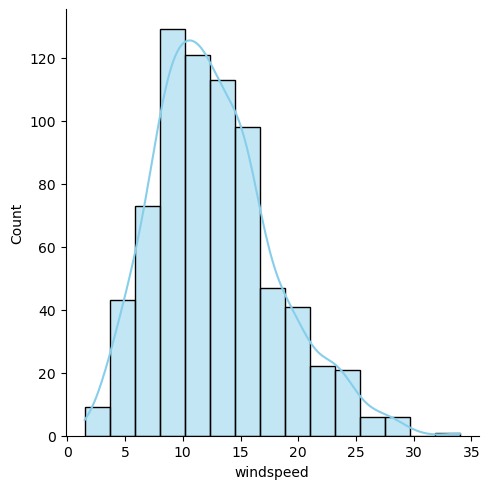

In [21]:
# wind speed
sns.displot(df['windspeed'], kde=True, bins=15, color='skyblue')
plt.show()

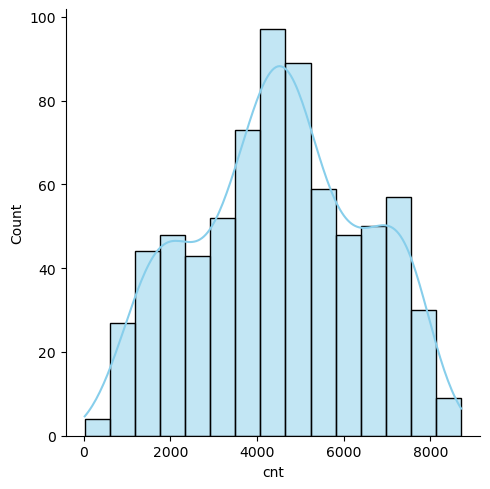

In [22]:
# target variable: count of total rental bikes including both casual and rigistered
sns.displot(df['cnt'], kde=True, bins=15, color='skyblue')
plt.show()

In [23]:
df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True)


In [24]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,0,Jan,0,Sat,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,Spring,0,Jan,0,Sun,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,Spring,0,Jan,0,Mon,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,Spring,0,Jan,0,Tues,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,Spring,0,Jan,0,Wed,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [25]:
df_categorical = df.select_dtypes(include=['object'])

In [26]:
df_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [27]:
df_categorical

,season,mnth,weekday,weathersit
0,Spring,Jan,Sat,B
1,Spring,Jan,Sun,B
2,Spring,Jan,Mon,A
3,Spring,Jan,Tues,A
4,Spring,Jan,Wed,A
...,...,...,...,...
725,Spring,Dec,Thurs,B
726,Spring,Dec,Fri,B
727,Spring,Dec,Sat,B
728,Spring,Dec,Sun,A


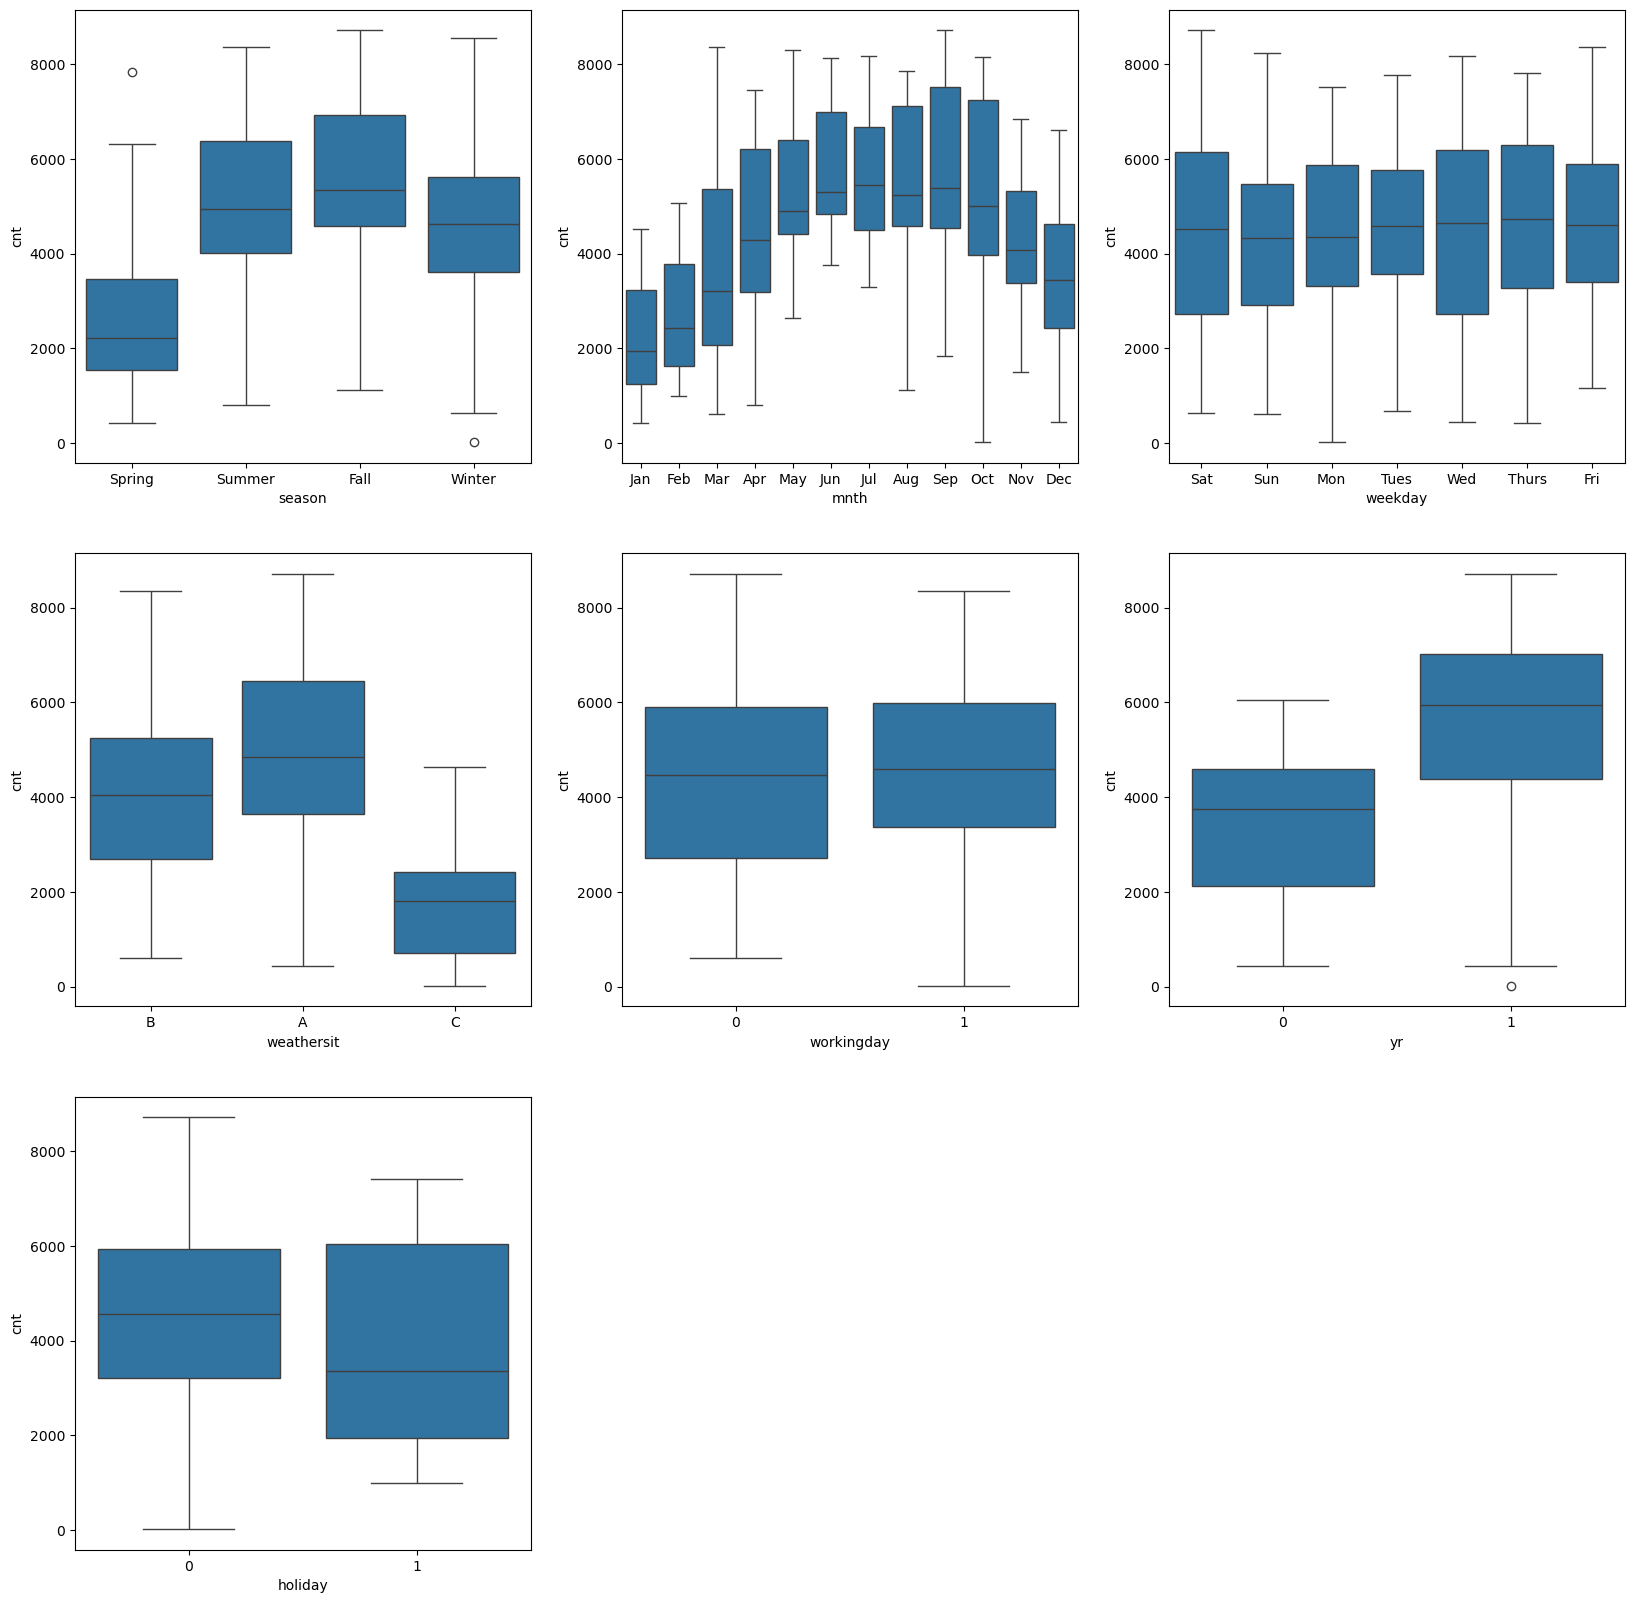

In [29]:
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

In [30]:
intVarlist = ["casual", "registered","cnt"]
for var in intVarlist:
    df[var] = df[var].astype("float")

In [31]:
df_numeric = df.select_dtypes(include = ['float64'])
df_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


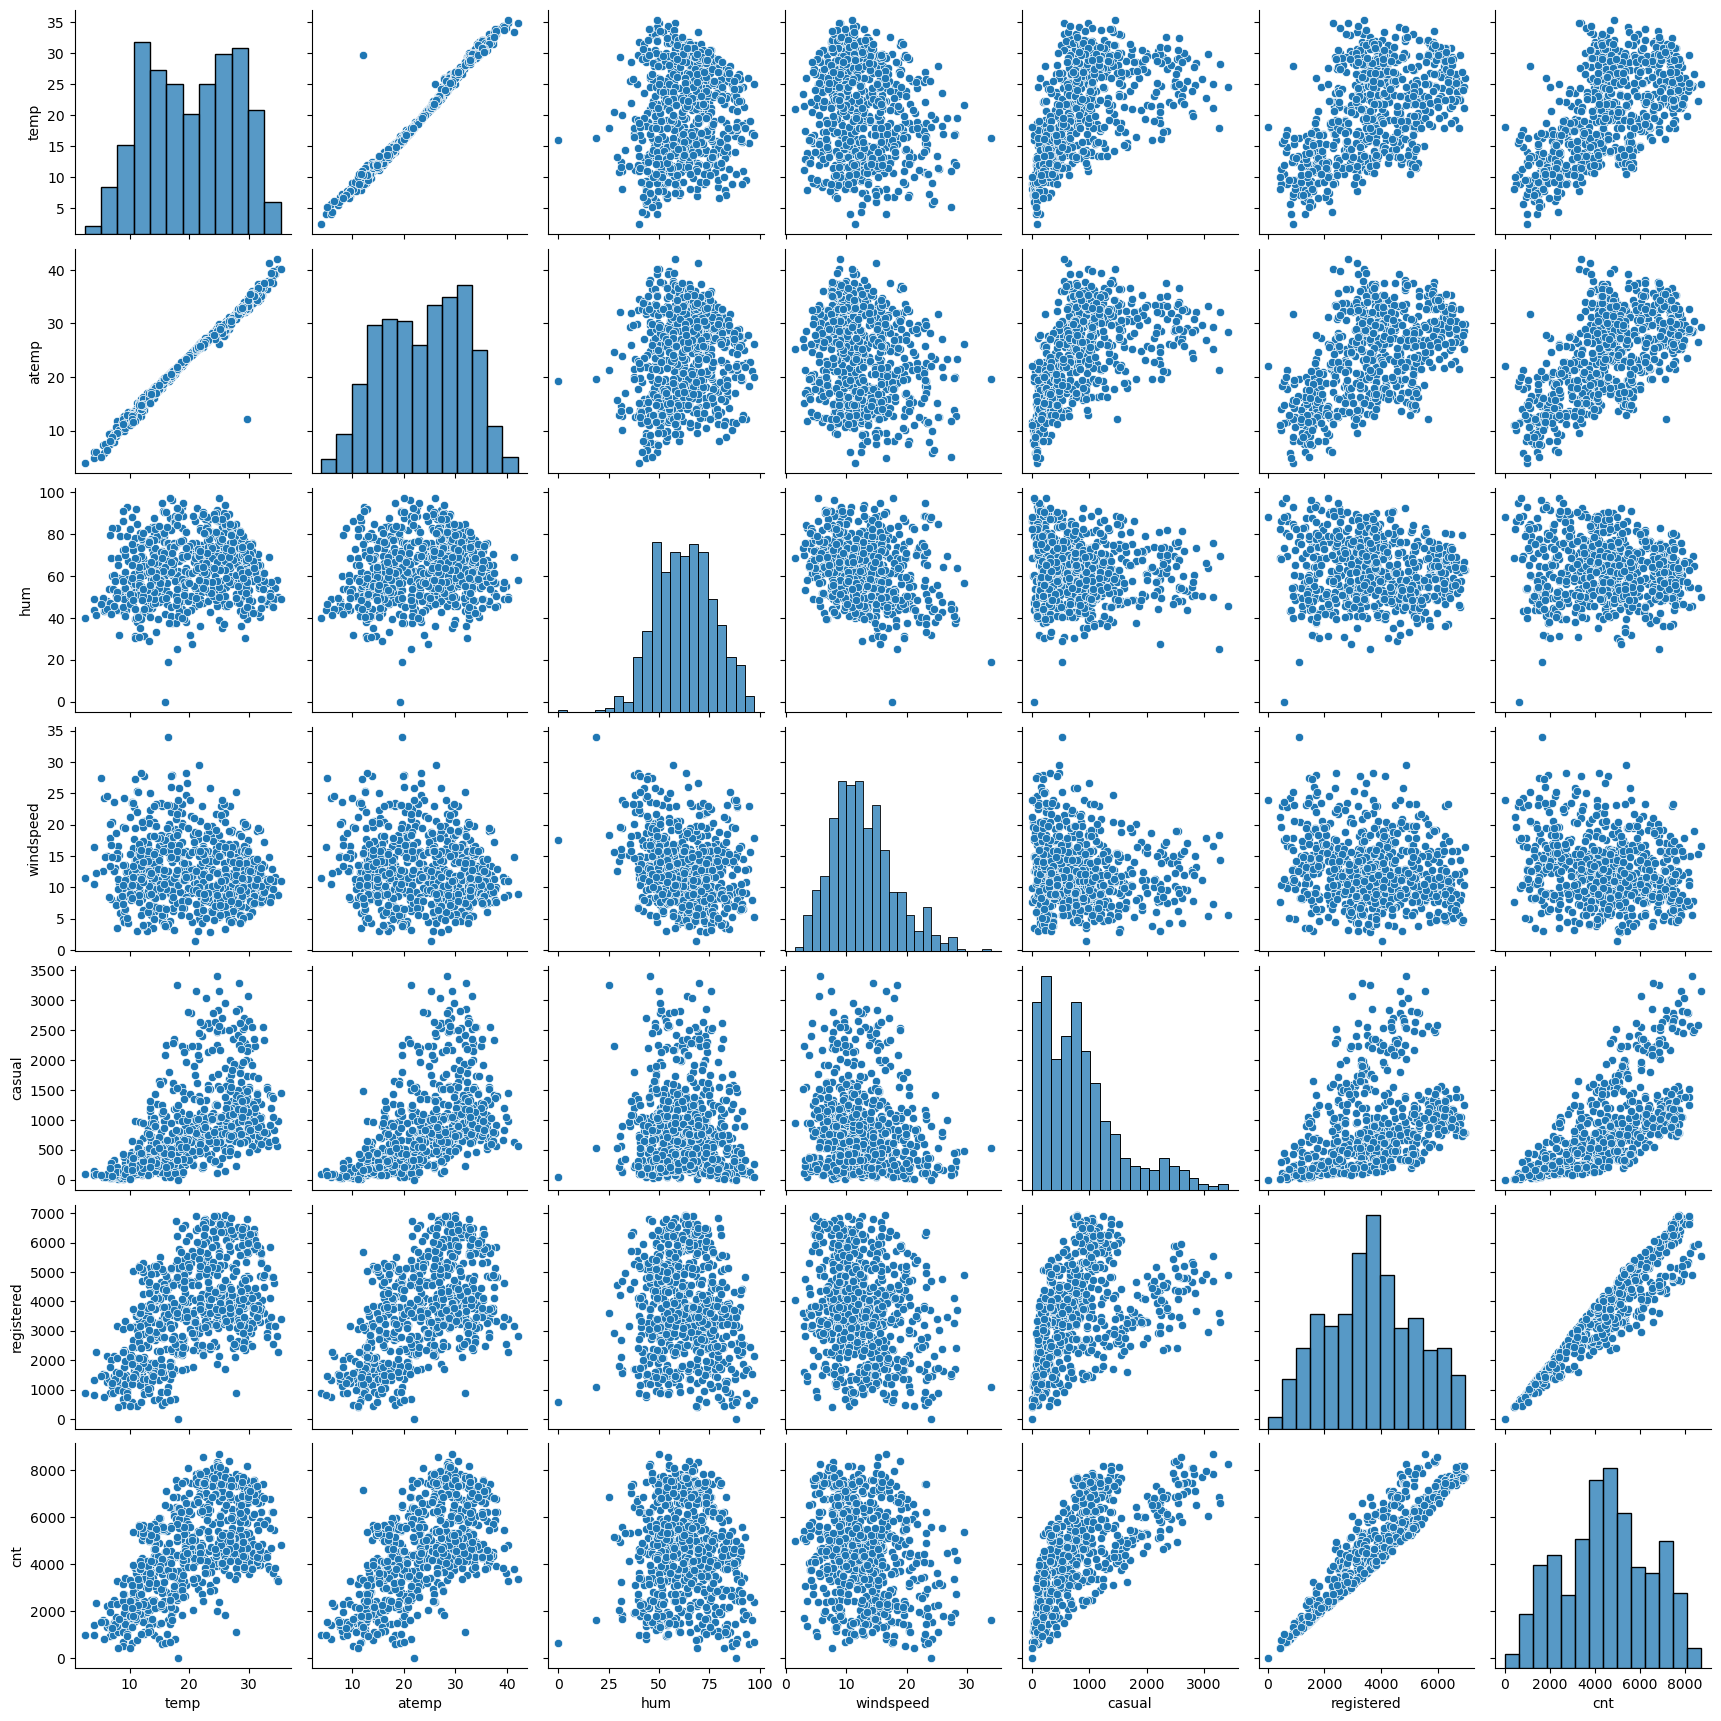

In [32]:
sns.pairplot(df_numeric)
plt.show()

In [33]:
corr = df_numeric.corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

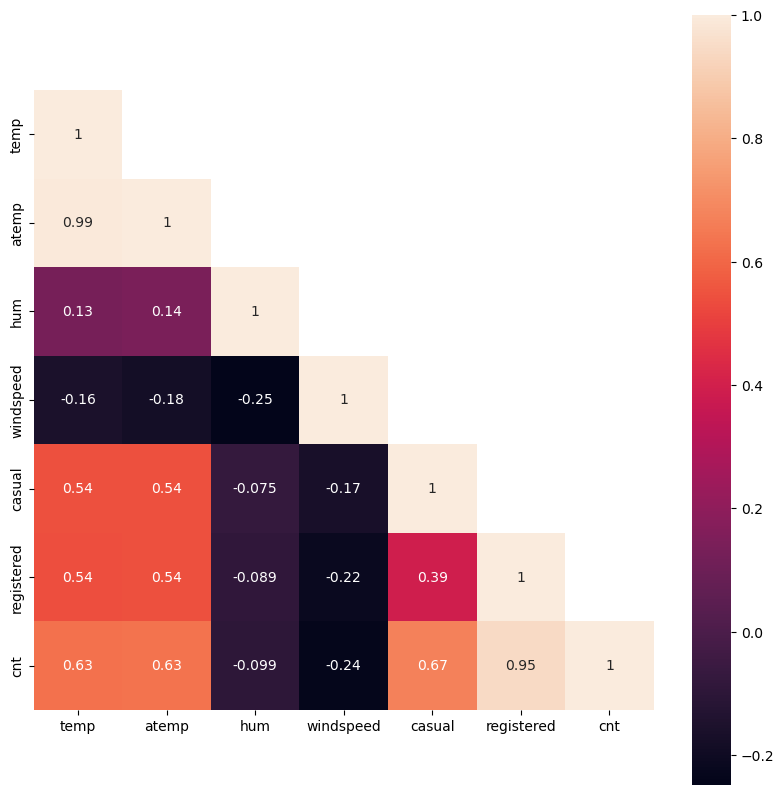

In [34]:
#heatmap
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr,mask=mask,vmax = 1,square = True,annot = True)

In [35]:
df.drop('atemp', axis=1, inplace=True)

In [36]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,0,Jan,0,Sat,0,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-01-02,Spring,0,Jan,0,Sun,0,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-01-03,Spring,0,Jan,0,Mon,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-01-04,Spring,0,Jan,0,Tues,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-01-05,Spring,0,Jan,0,Wed,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    float64       
 13  registered  730 non-null    float64       
 14  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(4), object(4)
memory usage: 85.7+ 

In [38]:
df_categorical = df.select_dtypes(include=['object'])

In [39]:
df_categorical.head()

,season,mnth,weekday,weathersit
0,Spring,Jan,Sat,B
1,Spring,Jan,Sun,B
2,Spring,Jan,Mon,A
3,Spring,Jan,Tues,A
4,Spring,Jan,Wed,A


In [40]:
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,0,Jan,0,Sat,0,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-01-02,Spring,0,Jan,0,Sun,0,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-01-03,Spring,0,Jan,0,Mon,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-01-04,Spring,0,Jan,0,Tues,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-01-05,Spring,0,Jan,0,Wed,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,Spring,1,Dec,0,Thurs,1,B,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,Spring,1,Dec,0,Fri,1,B,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,Spring,1,Dec,0,Sat,0,B,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,Spring,1,Dec,0,Sun,0,A,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [41]:
df.drop(list(df_categorical.columns), axis=1, inplace=True)

In [42]:
df

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-01-02,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-01-03,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-01-04,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-01-05,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [43]:
df = pd.concat([df, df_dummies], axis=1)

In [44]:
df.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,False,False,False,True,False,False,False,False,True,False
1,2,2018-01-02,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,False,False,False,False,True,False,False,False,True,False
2,3,2018-01-03,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,False,False,True,False,False,False,False,False,False,False
3,4,2018-01-04,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,False,False,False,False,False,False,True,False,False,False
4,5,2018-01-05,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,False,False,False,False,False,False,False,True,False,False


In [45]:
df.drop(['instant', 'dteday'], axis=1, inplace=True)

In [46]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_Spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,True,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,True,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,True,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,True,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,True,...,False,False,False,False,False,False,False,True,False,False


In [47]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [48]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_Spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,False,...,True,False,False,False,False,False,True,False,False,False
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,False,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,True,...,False,False,False,True,False,False,False,False,True,False
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,True,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,False,...,False,False,True,False,False,False,False,False,True,False
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,False,...,False,False,False,False,False,True,False,False,False,False
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,True,...,False,False,False,False,False,False,False,True,False,False
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,False,...,False,False,False,True,False,False,False,False,True,False


In [49]:
scaler = MinMaxScaler()
scale_vars = ["temp", "hum", "windspeed", "casual", "registered", "cnt"]
df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])
df_test[scale_vars] = scaler.transform(df_test[scale_vars])

In [50]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


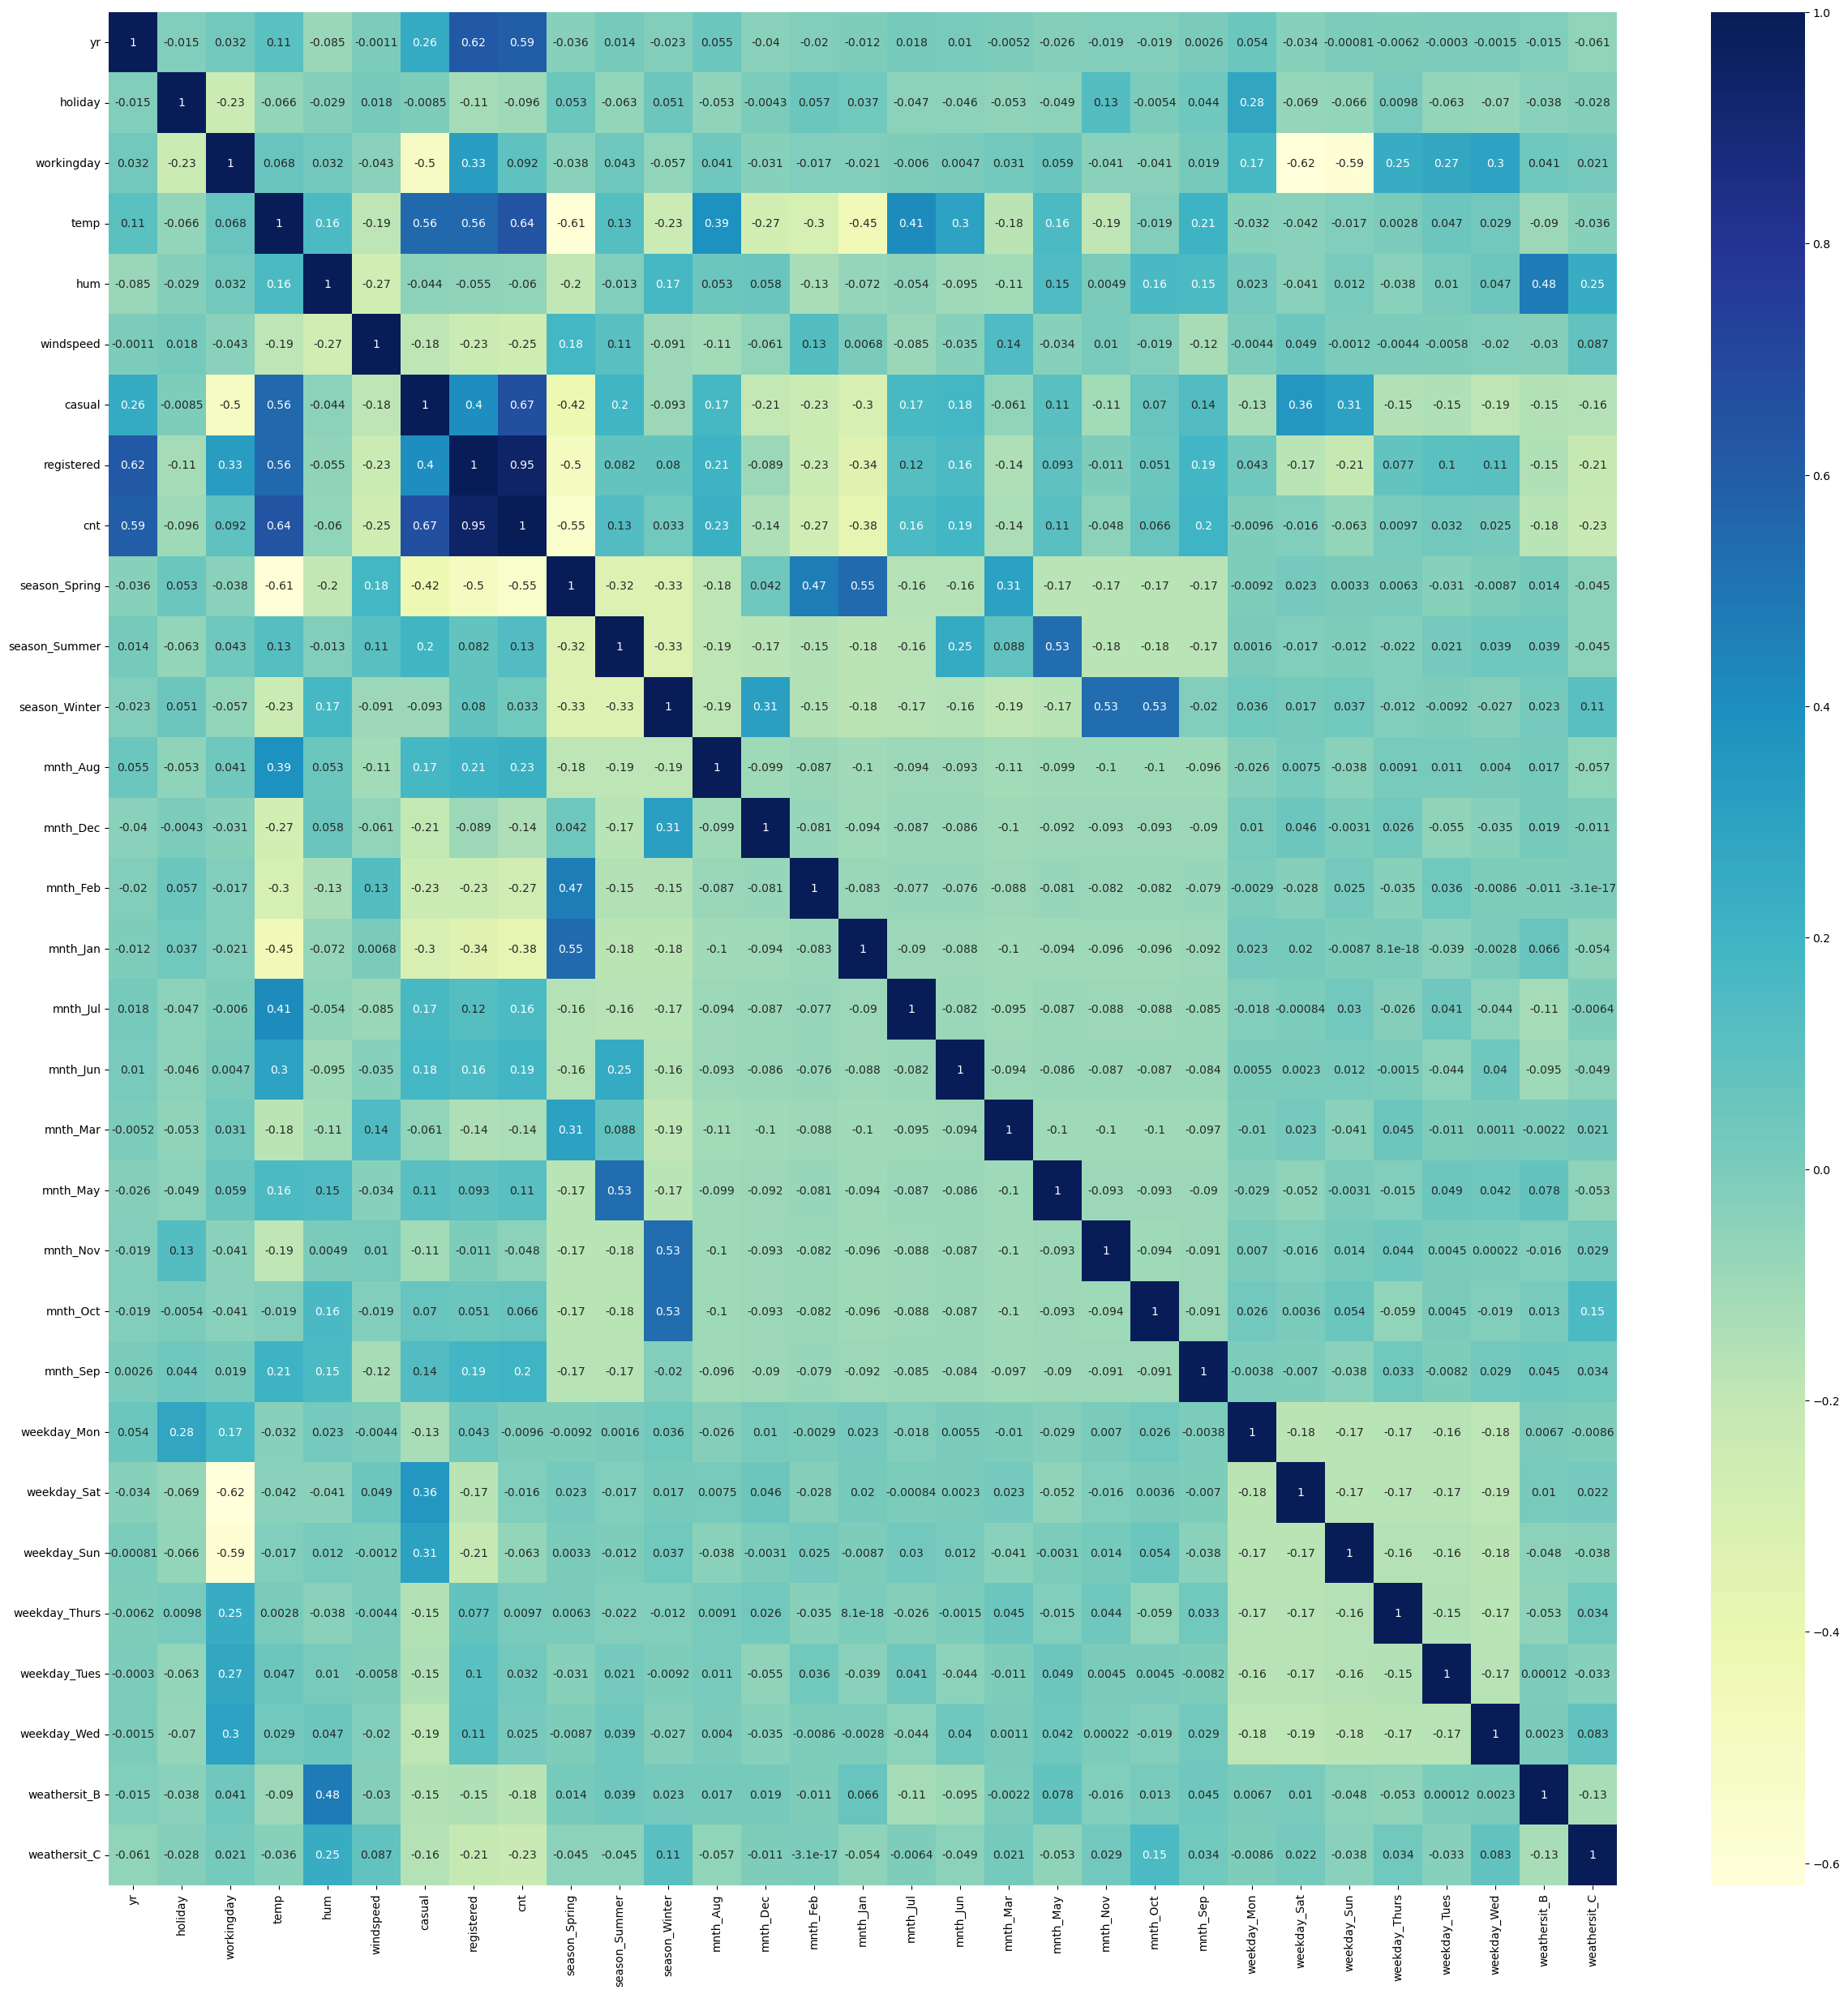

In [51]:
#checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30,30))
sns.heatmap(df_train.corr(),annot = True, cmap = "YlGnBu")
plt.show()
            

In [52]:
x_train = df_train.drop(["casual", "registered", "cnt"], axis=1)
y_train = df_train['cnt']


In [53]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
576,1,0,1,0.815169,0.725633,0.264686,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
728,1,0,0,0.245101,0.498067,0.663106,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False


In [54]:
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=7)
rfe.fit(x_train, y_train)
selected_cols = x_train.columns[rfe.support_]
x_train_rfe = x_train[selected_cols]

In [57]:
x_train_rfe_const = x_train_rfe_const.astype(float)
y_train = y_train.astype(float)

In [67]:
x_train_lm = sm.add_constant(x_train)
ols_model = sm.OLS(y_train, x_train_rfe_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     209.7
Date:                Sun, 10 Aug 2025   Prob (F-statistic):          1.35e-144
Time:                        22:31:42   Log-Likelihood:                 387.15
No. Observations:                 510   AIC:                            -758.3
Df Residuals:                     502   BIC:                            -724.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1306      0.022      5.988   

In [68]:
ols_model.params

const           0.130600
yr              0.234153
holiday        -0.041769
workingday      0.038567
temp            0.549192
windspeed      -0.178921
weekday_Sat     0.051370
weathersit_C   -0.222481
dtype: float64

In [70]:
# Force numeric conversion
x_train_rfe = x_train_rfe.apply(pd.to_numeric, errors='coerce')

# Drop any columns that became NaN after conversion
x_train_rfe = x_train_rfe.dropna(axis=1, how='any')

# Recheck dtypes
print(x_train_rfe.dtypes)


yr                int64
holiday           int64
workingday        int64
temp            float64
windspeed       float64
weekday_Sat        bool
weathersit_C       bool
dtype: object


In [72]:
x_test = df_test.drop(["casual", "registered", "cnt"], axis=1)
y_test = df_test['cnt']
x_test_rfe = x_test[selected_cols]
x_test_rfe_const = sm.add_constant(x_test_rfe)

y_pred = ols_model.predict(x_test_rfe_const)

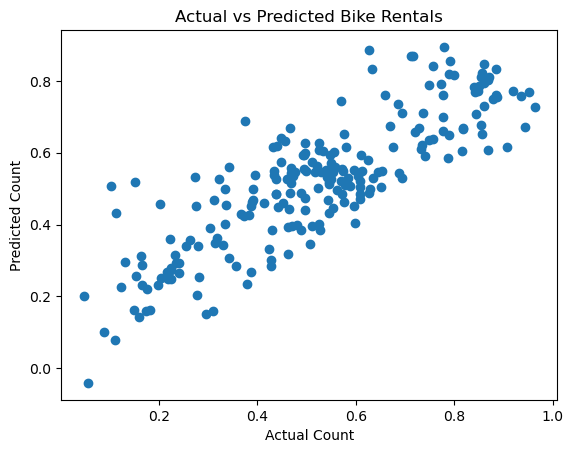

In [73]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Actual vs Predicted Bike Rentals")
plt.show()

In [74]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.703833350629471

R² Score: 0.7038
RMSE: 0.1186


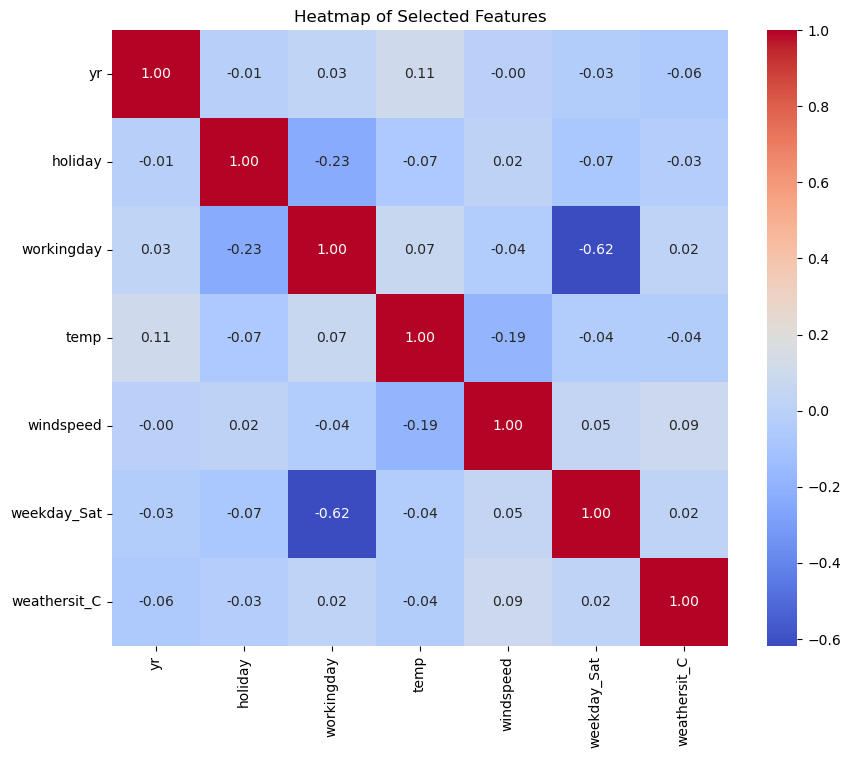

In [75]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

corr_matrix = x_train_rfe.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Heatmap of Selected Features")
plt.show()
